# Data Outlier Detection

Date: 13/05/2018

Version: 3.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* pandas
* LinearRegression from sklearn.linear_model
* train_test_split from sklearn.cross_validation 
* matplotlib.pyplot
* robust from statsmodel (for hampbell outlier detection)
* numpy
* matplotlib.gridspec


## 1. Introduction
This project comprises the execution of different outlier detection methods applied to different varaibles in order to identify outliers.

Tasks:
1. Importing libraries
2. Data read and check 
3. Functions
4. outlier detection and removal
5. writing data back 
6. summary

More details for each task will be given in the following sections.

# Imports

In [1]:
#importing libraries; more libraries will be added later if needed
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from statsmodels import robust 
import numpy
import matplotlib.gridspec as gridspec

#code to show plots inline
%matplotlib inline

C:\Users\rizvi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data read and check

In [2]:
df = pd.read_csv('dataset4_with_outliers.csv')

In [3]:
len(df)

9996

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 19 columns):
id               9996 non-null int64
date             9996 non-null object
price            9996 non-null float64
bedrooms         9996 non-null int64
bathrooms        9996 non-null float64
sqft_living      9996 non-null int64
sqft_lot         9996 non-null int64
floors           9996 non-null float64
waterfront       9996 non-null int64
view             9996 non-null int64
condition        9996 non-null int64
grade            9996 non-null int64
sqft_above       9996 non-null int64
sqft_basement    9996 non-null int64
yr_built         9996 non-null int64
yr_renovated     9996 non-null int64
zipcode          9996 non-null int64
lat              9996 non-null float64
long             9996 non-null float64
dtypes: float64(5), int64(13), object(1)
memory usage: 1.4+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


# Functions

In [7]:
#for univariate outlier methods
def univ_detect_outlier(data, var, method, val):
    '''
    input: dataframe, var, method, val
    method: iqr, mad, or sd
    val: is the number of sd, iqr or mad away
    output: tuple(total length of dataframe, total outliers, bool of outliers)
    '''
    df = data.loc[:, var]
    if method == 'mad':
        outliers_bool = abs(df - df.median()) > val * robust.mad(df)
    elif method == 'sd':
        outliers_bool = abs(df - df.mean()) > val * df.std()
    elif method == 'iqr':
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3-q1
        outliers_bool = (df < q1 - val * iqr) | (df > q3 + val * iqr)
    else:
        print('incorrect method, try again with iqr, mad, or sd')
    
    count_tot = len(df)
    count_out = len(df[outliers_bool])
    result = tuple([count_tot, count_out, outliers_bool])
    return result

In [8]:
#for bivariate lr detection and deletion of outliers
def lr_outlierCleaner(predictions, X, Y, percentage_for_out_rem, out_type):
    """
        clean away the 10% of points that have the largest
        residual errors (different between the prediction
        and the actual net worth)

        return a list of tuples named cleaned_data where 
        each tuple is of the form (X, Y, error)
    """
    
    #calculate the error,make it descend sort, and fetch 90% of the data
    
    errors = (Y-predictions)**2
    cleaned_data =zip(X,Y,errors)
    cleaned_data = sorted(cleaned_data,key=lambda x:x[-1][0], reverse=True)
    print('total data',len(cleaned_data))
    limit = int(len(Y)*percentage_for_out_rem)
    print('total outliers',limit)
    
    if out_type == 'out':
        return cleaned_data[:limit]
    elif out_type == 'rem':
        return cleaned_data[limit:]
    elif out_type == 'all':
        return cleaned_data
    else: 
        print('wrong out_type choose, rem, out, all')
        return

In [9]:
# detect outliers and return them and plot them
def plot_lr_outliers(var_x, var_y, perc_for_outliers, xlab='varx', ylab='vary'):
    '''
    plots the outliers for the given percentage
    input: var_x for variable x and var_y for variable y, perc_for_outliers is the % for detection
    output: (ouliters for x, outliers for y, outlier errors from prediction)
    '''

    #lets try to identify outliers with linear modeling
    X = numpy.reshape( numpy.array(var_x), (len(var_x), 1))
    y = numpy.reshape( numpy.array(var_y), (len(var_y), 1))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=111)
    lm = LinearRegression()
    lm.fit(Xtrain, ytrain)
    print('score', lm.score(Xtest, ytest))
    print('coef', lm.coef_)

    #removing outliers
    predictions = lm.predict(X)
    cleaned_data = lr_outlierCleaner( predictions, X, y, perc_for_outliers, 'rem')
    if len(cleaned_data) > 0:
        newX, newy, newerrors = zip(*cleaned_data)
        newX = numpy.reshape( numpy.array(newX), (len(newX), 1))
        newy = numpy.reshape( numpy.array(newy), (len(newy), 1))
        newerrors = numpy.reshape( numpy.array(newerrors), (len(newerrors), 1))
    else:
        print('no outliers detected')
        return

    # getting outliers
    outliers = lr_outlierCleaner(predictions, X, y,perc_for_outliers, 'out')
    oX, oy, oerrors = zip(*outliers)
#     oX = numpy.reshape( numpy.array(oX), (len(oX), 1))
#     oy = numpy.reshape( numpy.array(oy), (len(oy), 1))
#     oerrors = numpy.reshape( numpy.array(oerrors), (len(oerrors), 1))

    #plotting
    gs = gridspec.GridSpec(2,2)
    plt.figure(figsize=(10,10))

    #orig
    ax = plt.subplot(gs[0,1])
    ax.set_title('orig')
    plt.scatter(var_x, var_y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

    #without out
    ax = plt.subplot(gs[1,0])
    ax.set_title('without outliers')
    plt.scatter(newX, newy)
    lr = LinearRegression()
    lr.fit(newX, newy)
    plt.plot(newX, lm.predict(newX), color='k')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

    #highligh out
    ax = plt.subplot(gs[1,1])
    ax.set_title('highlighted outliers')
    plt.scatter(var_x, var_y)
    plt.plot(X, lm.predict(X), color='k')
    plt.scatter(oX, oy, color='red')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
    #return output
    return [oX, oy, oerrors, newX, newy, newerrors]

In [10]:
def l_model(data, Xv, yv):
    '''
    input: dataframe, column x name, column y name
    output: new dataframe with column of errors
    run a linear model on dataframe data, with columns Xv and yv. 
    predict yv and make extra column in dataframe for errors from predictions.
    '''
    df = data.copy()
    X = df.loc[:, [Xv]]
    y = df.loc[:, [yv]]
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=111)
    lm = LinearRegression()
    lm.fit(Xtrain, ytrain)
    print(lm.score(Xtest, ytest))
    predictions = lm.predict(X)
    str_err = 'err_'+Xv+'_'+yv
    df[str_err] = (y-predictions)**2
    return df
    

# Outlier Detection

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


The dataset has some numerical variables as well as some variables that are ordered catagorical variables. Lets try to identify the general pattern between the numerical varaibles by viewing the scatter matrix. 

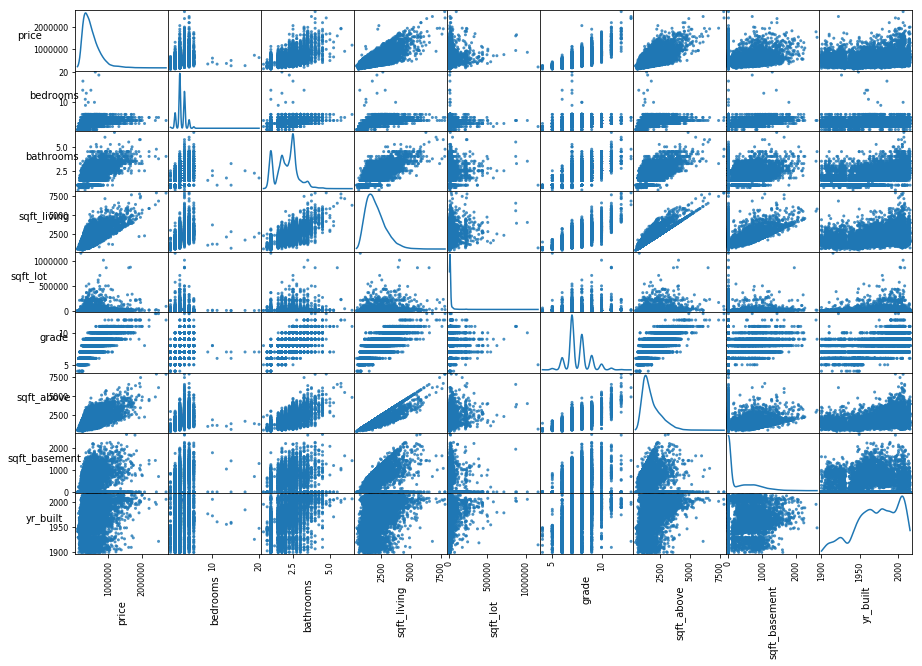

In [12]:
dd = df.drop(['id', 'date', 'floors', 'waterfront', 'view', 'condition','yr_renovated', 'zipcode', 'lat', 'long' ], axis=1)
# dd.plot.scatter_matrix()
sm = pd.plotting.scatter_matrix(dd, alpha=0.8, figsize=(15, 10), diagonal='kde')
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
plt.show()
#pd.plotting.scatter_matrix(df[['price', 'bathrooms', 'bedrooms']], alpha=0.2)

There seem to be alot of points that seem to be out of place than most of them. 

The most obvious ones, in the sense that they are way off the trend. They seem to be in:
- bedrooms and bathrooms
- price and sqft_living
- price and grade
- price and sqft_above
- price and sqft_lot (however there seems to be no relationship correlation between sqft_lot with other variables)

hence lets first try to view them. 

Lets draw the scatter plots of the above and highlight 0.2% of the points that have the higheest error from the prediction of the linear regression.

bed&bath
total data 9996
total outliers 19
--
price&living
total data 9996
total outliers 19
--
price&grade
total data 9996
total outliers 19
--
price&above
total data 9996
total outliers 19
--
price&lot
total data 9996
total outliers 19
--


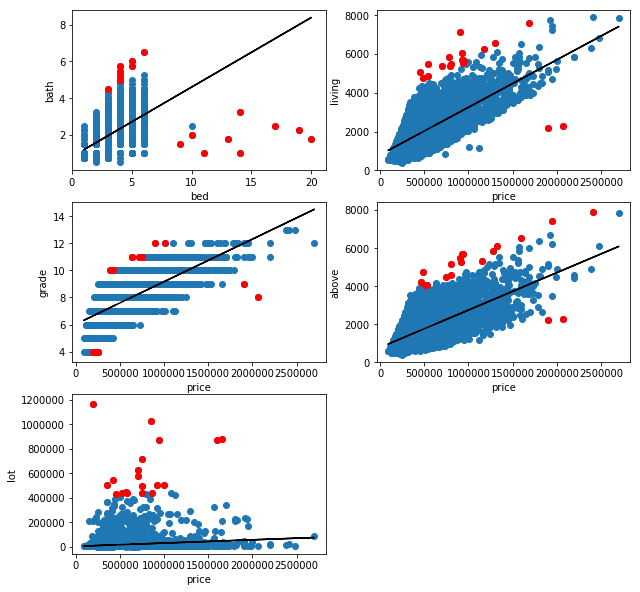

In [13]:
#lets try to identify outliers with linear modeling
plotxy = [(df.bedrooms, df.bathrooms,0,0,'bed', 'bath'), (df.price, df.sqft_living,0,1, 'price', 'living'), (df.price, df.grade,1,0,'price', 'grade'), (df.price, df.sqft_above,1,1,'price', 'above'), (df.price, df.sqft_lot,2,0, 'price', 'lot')]

#plotting
gs = gridspec.GridSpec(3,2)
plt.figure(figsize=(10,10))

for xy in plotxy:
    
    print(xy[4] + '&' + xy[5])

    X = numpy.reshape( numpy.array(xy[0]), (len(xy[0]), 1))
    y = numpy.reshape( numpy.array(xy[1]), (len(xy[1]), 1))

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=111)
    lm = LinearRegression()
    lm.fit(Xtrain, ytrain)
    predictions = lm.predict(X)

    # getting outliers
    outliers = lr_outlierCleaner(predictions, X, y,0.002, 'out')
    oX, oy, oerrors = zip(*outliers)


    #highligh out
    ax = plt.subplot(gs[xy[2],xy[3]])
    plt.scatter(X, y)
    plt.plot(X, lm.predict(X), color='k')
    plt.scatter(oX, oy, color='red')
    ax.set_xlabel(xy[4])
    ax.set_ylabel(xy[5])
    
    print('--')

We can see that there seem to be outliers in these. 

Now in identifying the outliers correctly there are many different ways of doing so. There is the univariate way in which you can use either the boxplot, hampel identifier, 3 standard deviation rule. 

Or you can use the regression line to identify outliers by fitting a model and checking the errors of points from the predicted ones of the model. 

The third type is to identify outliers through clustering. 

In this we can either use the univariate, or regression model to identify outliers. The reason for not using LOF (which can be used from sciket learn) is that none of the data seems to be in clusters and follow a general pattern. Hence lets try to first identify the outlers in bedrroms by comparing it with bathrooms and fitting a model through it. 

In this report, we will only be focusing on variables that might be able to help predict the price with a model, as that seems to be the main pupose of the dataset in future. 

## Bedrooms and Bathrooms

Since the number of bedrooms and the number of bathrooms should be somewhat positively correlated hence we can try to identify outliers using the linear regression and check for the erros. 

score 0.20858196719706557
coef [[0.37840227]]
total data 9996
total outliers 9
total data 9996
total outliers 9


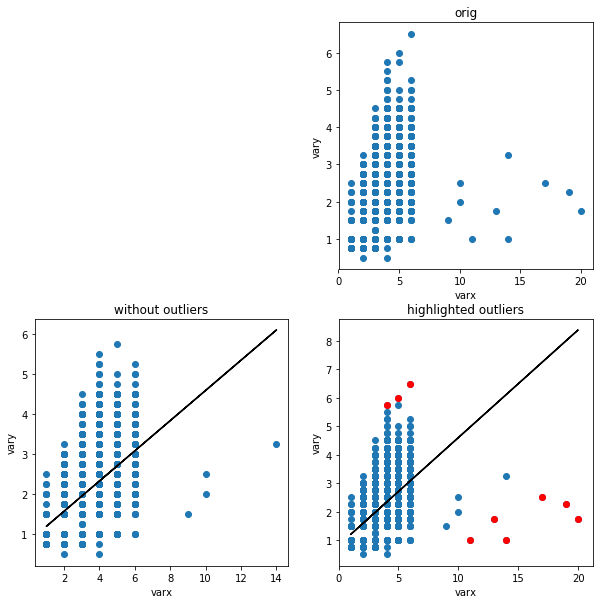

In [14]:
#data to check
x = df.bedrooms
y = df.bathrooms
p = 0.001

#storing result of function
result = plot_lr_outliers(x, y, p)

In [15]:
#identify outlier rows
xy = list(zip(result[0], result[1]))
df[df.apply(lambda x: True if (x[3], x[4]) in xy else False, axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
161,1214000050,20141020T000000,350000.0,13,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166,47.4593,-122.343
2019,3644100073,20141122T000000,245000.0,14,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295
2610,2919200280,20141208T000000,720168.0,19,2.25,2120,3794,2.0,0,0,4,7,1420,700,1926,0,98117,47.6893,-122.359
4726,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013
4846,3211101010,20150211T000000,319500.0,11,1.00,1190,8450,1.0,0,0,5,6,1190,0,1961,0,98059,47.4807,-122.157
5197,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114
7196,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039
8004,9441300030,20150410T000000,615000.0,20,1.75,2620,8280,1.0,0,0,4,7,1330,1290,1948,0,98177,47.7235,-122.359
9655,739820050,20150505T000000,250000.0,17,2.50,1730,7200,2.0,0,0,4,7,1730,0,1985,0,98031,47.4029,-122.196


we can see that there are a few ouliers with a large amount of bedrooms but very small amount of bathroom. In houses this is generally not the case. Through linear regression by viewing .3% of datapoints with the highest errors from predictions we can clearly identify the outliers highlighted in red. 

In [16]:
a = univ_detect_outlier(df, 'bathrooms', 'mad', 3)
print(a[0], a[1])
df[a[2]]

9996 53


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
527,8089510170,20141027T000000,935000.0,5,4.50,4230,9701,2.0,0,0,3,10,4230,0,1999,0,98006,47.5444,-122.131
1248,7237500390,20141110T000000,1570000.0,5,4.50,6070,14731,2.0,0,0,3,11,6070,0,2004,0,98059,47.5306,-122.134
1537,5317100294,20141113T000000,1333000.0,4,4.50,3130,5126,3.0,0,0,3,10,2450,680,2014,0,98112,47.6239,-122.290
1584,8924600020,20141114T000000,1535000.0,4,4.50,5770,10050,1.0,0,3,5,9,3160,2610,1949,0,98115,47.6770,-122.275
1606,7853280370,20141114T000000,805000.0,5,4.50,4600,7810,2.0,0,0,3,9,3200,1400,2006,0,98065,47.5381,-121.860
1623,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,3,11,6110,0,2005,0,98059,47.5285,-122.135
1719,9297300740,20141118T000000,643500.0,6,5.25,3600,3960,2.0,0,0,3,7,2400,1200,1971,0,98126,47.5656,-122.372
1727,226059096,20141118T000000,1565000.0,5,4.50,5220,67319,2.0,0,0,3,11,5220,0,2001,0,98072,47.7666,-122.128
1989,1725059136,20141121T000000,1815000.0,4,4.50,4510,12873,2.0,0,2,3,12,4510,0,1998,0,98033,47.6491,-122.201
2116,8901000143,20141125T000000,500000.0,4,4.50,2690,7350,1.5,0,0,5,7,2690,0,1949,0,98125,47.7062,-122.311


In [17]:
df[df.bathrooms > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1623,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,3,11,6110,0,2005,0,98059,47.5285,-122.135
1719,9297300740,20141118T000000,643500.0,6,5.25,3600,3960,2.0,0,0,3,7,2400,1200,1971,0,98126,47.5656,-122.372
2749,98000950,20141210T000000,1060000.0,4,5.25,4140,14757,2.0,0,2,3,11,4140,0,2005,0,98075,47.5871,-121.969
4468,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084
4726,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013
5197,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114
7196,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039
8313,1125079111,20150415T000000,1600000.0,4,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878


However larger number of bathrooms compared to bedrroms is generally not an odd occurence as there are guest bathrooms available. Hence we can exclude the lower half of the highlighted outliers where the bathrooms are much less than the bedrooms. 

To remove the outliers we just remove the records that include them. We cannot remove using a univariate outlier detection on the errors because we know we dont wnat to remove all of them, only the ones that that have large number of bedrooms but very little bathrooms. Hence we do it manually. 

In [18]:
df = df[~((df.bathrooms < 4) & (df.bedrooms>6))]

Once they have been removed lets look at the scatter matrix again. There might have been other issues with these removed records aswell that might also have been removed with these.

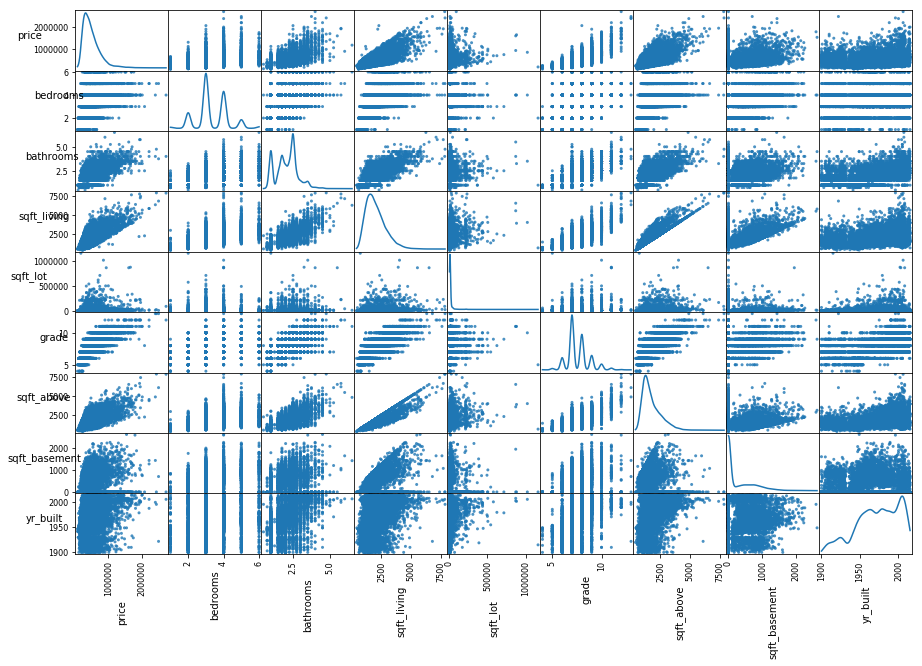

In [19]:
dd = df.drop(['id', 'date', 'floors', 'waterfront', 'view', 'condition','yr_renovated', 'zipcode', 'lat', 'long' ], axis=1)
# dd.plot.scatter_matrix()
sm = pd.plotting.scatter_matrix(dd, alpha=0.8, figsize=(15, 10), diagonal='kde')
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
plt.show()
#pd.plotting.scatter_matrix(df[['price', 'bathrooms', 'bedrooms']], alpha=0.2)

Okay so we can see that sqft_living and sqft_lot with price still have a lot of outliers so lets try to remove them with linear regression aswell. 

# price and sqft living

With the price and the square foot of the living, they should have a generally positive correlation as when the price increases the sqft of living should also increase. To further check this lets see the scatter plot.

score 0.5158561177575268
coef [[0.00242929]]
total data 9986
total outliers 39
total data 9986
total outliers 39


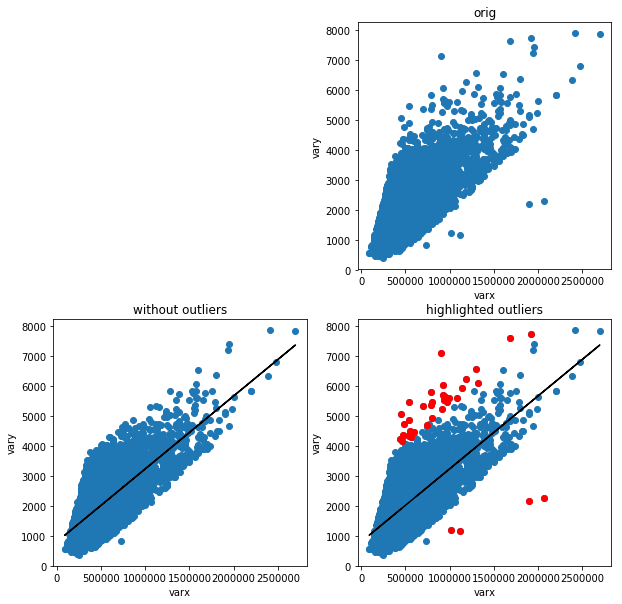

In [20]:
#data to check
x = df.price
y = df.sqft_living
p = 0.004

#storing result of function
result = plot_lr_outliers(x, y, p)


We can see that there are a few properties where the square foot of living is too low compared to the price compared to others. First lets try to check these rows. 

To filter these lets try to use the same regression line but shift its intercept down and use this to extract the points.

In [21]:
df[df.sqft_living < (0.00242492 * df.price) - 1000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169
3777,9808630120,20150108T000000,1.903987e+06,3,2.50,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203
5072,5272200005,20150218T000000,1.122948e+06,2,1.00,1160,6911,1.0,0,0,3,7,1160,0,1947,0,98125,47.7149,-122.318
8869,8943600430,20150423T000000,2.066243e+06,3,2.50,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


However we are not getting one of the points, so lets try to increase the slope of the line a bit. 

In [22]:
df[df.sqft_living < (0.00275* df.price) - 1000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8,7200179,20141016T000000,7.306070e+05,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169
3777,9808630120,20150108T000000,1.903987e+06,3,2.50,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203
5072,5272200005,20150218T000000,1.122948e+06,2,1.00,1160,6911,1.0,0,0,3,7,1160,0,1947,0,98125,47.7149,-122.318
8869,8943600430,20150423T000000,2.066243e+06,3,2.50,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


We cant see the ouliers in price and sqft_living with univariate outlier detection as they depends on alot of other factors. One way is to view the prices and sqft_living within their zipcodes as they represent the same neighbourhood. 

In [23]:
#viewing df for zipcode 98055
df[df.zipcode == 98055]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8,7200179,20141016T000000,730607.043194,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211
22,2781280300,20141016T000000,249900.000000,3,2.50,1610,3517,2.0,0,0,3,8,1610,0,2005,0,98055,47.4496,-122.189
38,7225000090,20141017T000000,245000.000000,2,2.00,1070,4500,1.0,0,0,4,6,910,160,1932,0,98055,47.4896,-122.204
52,9485750240,20141017T000000,395000.000000,3,2.50,2310,4930,2.0,0,0,4,8,2310,0,1989,0,98055,47.4512,-122.208
127,2475200290,20141020T000000,332544.000000,2,1.75,1710,4187,1.0,0,0,3,7,1710,0,1987,0,98055,47.4732,-122.188
137,2475200370,20141020T000000,350000.000000,3,2.50,1630,5996,2.0,0,0,3,7,1630,0,1986,0,98055,47.4738,-122.190
221,4204400201,20141021T000000,216180.000000,2,1.00,1120,7797,1.0,0,0,3,6,1120,0,1948,0,98055,47.4871,-122.220
345,7231501610,20141023T000000,327000.000000,4,1.00,1620,6000,1.5,0,0,5,7,1620,0,1905,0,98055,47.4763,-122.206
479,7841300505,20141027T000000,430000.000000,4,3.75,2452,4800,2.0,0,0,3,7,2452,0,1936,1994,98055,47.4744,-122.213
583,2641400290,20141028T000000,349000.000000,4,2.50,1800,7620,2.0,0,0,3,8,1800,0,1995,0,98055,47.4346,-122.201


The price seems much higher than the other properties in the zipcode. Lets try to see if there is any other price greater than this. 

In [24]:
df[df.zipcode == 98055].price.max()

730607.0431942892

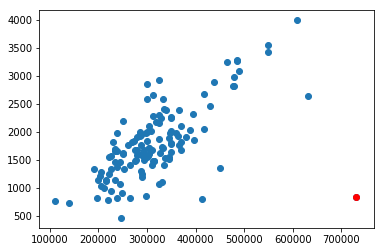

In [25]:
dd = df[df.zipcode == 98055]
dd_point = df[df.id == 7200179]
plt.scatter(dd.price, dd.sqft_living)
plt.scatter(dd_point.price, dd_point.sqft_living, color='red')

This price seems to be the highest and definately the outlier as shown in the scatter plot aswell. 

Lets try to confirm it with another zipcode. 

In [26]:
df[df.zipcode == 98058]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
188,2314300200,20141021T000000,4.495000e+05,4,3.00,2580,7299,2.0,0,0,3,8,2580,0,1998,0,98058,47.4646,-122.150
191,8856920070,20141021T000000,3.710000e+05,3,2.50,2150,8361,2.0,0,0,3,8,2150,0,1991,0,98058,47.4627,-122.129
235,1432701510,20141021T000000,2.490000e+05,4,2.00,1280,7560,1.0,0,0,5,6,1280,0,1959,0,98058,47.4500,-122.175
272,984000710,20141022T000000,2.700000e+05,3,2.00,1560,8853,1.0,0,0,3,7,1560,0,1967,0,98058,47.4312,-122.171
317,3623059027,20141022T000000,2.000000e+05,2,0.75,780,55764,1.0,0,0,4,4,780,0,1945,0,98058,47.4420,-122.105
377,1402650360,20141023T000000,3.842000e+05,3,2.50,2430,7613,2.0,0,0,4,8,2430,0,1986,0,98058,47.4383,-122.135
458,5112800210,20141024T000000,2.559500e+05,4,1.00,1500,11050,1.0,0,0,5,7,1500,0,1964,0,98058,47.4509,-122.088
483,2473350710,20141027T000000,3.900000e+05,4,1.75,2330,8364,1.0,0,0,4,8,2330,0,1968,0,98058,47.4568,-122.146
490,2473410740,20141027T000000,3.150000e+05,3,1.75,1460,7884,1.0,0,0,3,8,1460,0,1975,0,98058,47.4457,-122.128
498,1328340380,20141027T000000,3.150000e+05,3,1.75,1340,12800,1.0,0,0,3,7,880,460,1981,0,98058,47.4437,-122.137


the dataframe is convertin the prices in a wierd format and is difficult to read hence lets try to view them in the correc tformat

In [27]:
#https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string
#stoping pandas from converting to e format.
dd = df.copy()
dd.price = dd.price.map(lambda x: '{:.4f}'.format(x))

In [28]:
dd[(df.zipcode == 98058) & (df.id > 1050)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
188,2314300200,20141021T000000,449500.0000,4,3.00,2580,7299,2.0,0,0,3,8,2580,0,1998,0,98058,47.4646,-122.150
191,8856920070,20141021T000000,371000.0000,3,2.50,2150,8361,2.0,0,0,3,8,2150,0,1991,0,98058,47.4627,-122.129
235,1432701510,20141021T000000,249000.0000,4,2.00,1280,7560,1.0,0,0,5,6,1280,0,1959,0,98058,47.4500,-122.175
272,984000710,20141022T000000,270000.0000,3,2.00,1560,8853,1.0,0,0,3,7,1560,0,1967,0,98058,47.4312,-122.171
317,3623059027,20141022T000000,200000.0000,2,0.75,780,55764,1.0,0,0,4,4,780,0,1945,0,98058,47.4420,-122.105
377,1402650360,20141023T000000,384200.0000,3,2.50,2430,7613,2.0,0,0,4,8,2430,0,1986,0,98058,47.4383,-122.135
458,5112800210,20141024T000000,255950.0000,4,1.00,1500,11050,1.0,0,0,5,7,1500,0,1964,0,98058,47.4509,-122.088
483,2473350710,20141027T000000,390000.0000,4,1.75,2330,8364,1.0,0,0,4,8,2330,0,1968,0,98058,47.4568,-122.146
490,2473410740,20141027T000000,315000.0000,3,1.75,1460,7884,1.0,0,0,3,8,1460,0,1975,0,98058,47.4457,-122.128
498,1328340380,20141027T000000,315000.0000,3,1.75,1340,12800,1.0,0,0,3,7,880,460,1981,0,98058,47.4437,-122.137


In [29]:
df[df.zipcode == 98058].price.max()

1011233.3172464564

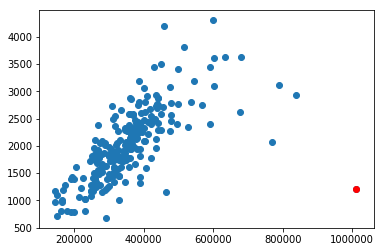

In [30]:
dd = df[df.zipcode == 98058]
dd_point = df[df.id == 2473381070]
plt.scatter(dd.price, dd.sqft_living)
plt.scatter(dd_point.price, dd_point.sqft_living, color='red')

Our outlier is the maximum in the zipcode aswell by a large margin and the scatter plot shows that it is way off in price with respect ot the sqft_living aswell.  

However anything to notice is that these values seem to be very differnt in terms of their figures. The outliers seem not to be rounded off while the other prices are clean integers.

Lets try to check for all dirty integers. if only the outliers are in these wierd floats, then we should be able to get all thes as before. 

In [31]:
df[df.price - round(df.price) != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8,7200179,20141016T000000,7.306070e+05,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169
2359,7192800145,20141202T000000,9.777699e+05,2,1.00,2100,4480,1.0,0,0,5,7,1400,700,1908,0,98126,47.5740,-122.372
2651,8651400230,20141208T000000,6.420636e+05,3,2.00,1100,5200,1.0,0,0,3,6,1100,0,1969,2014,98042,47.3606,-122.083
3777,9808630120,20150108T000000,1.903987e+06,3,2.50,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203
5072,5272200005,20150218T000000,1.122948e+06,2,1.00,1160,6911,1.0,0,0,3,7,1160,0,1947,0,98125,47.7149,-122.318
8869,8943600430,20150423T000000,2.066243e+06,3,2.50,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


These seem to be the smae as our previous outliers but there seems to be two more points. Lets try to plot them and see ones these are. 

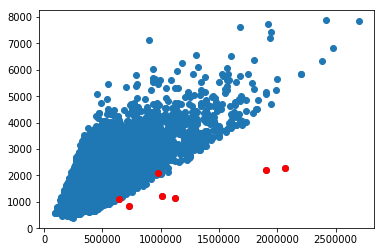

In [32]:

dirty_price_df = df[df.price - round(df.price) != 0]

plt.scatter(df.price, df.sqft_living)
plt.scatter(dirty_price_df.price, dirty_price_df.sqft_living, color='red') 

The extra two points seem to be in high density areas and maybe thats why the regression could not pick them up. Lets view these with their zip codes.

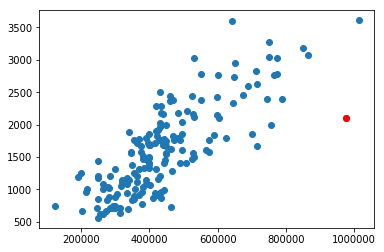

In [33]:
dd = df[df.zipcode == 98126]
dd_point = df[df.id == 7192800145]
plt.scatter(dd.price, dd.sqft_living)
plt.scatter(dd_point.price, dd_point.sqft_living, color='red')

This seesm to be an outliers aswell. lets confirm the second dirty point.

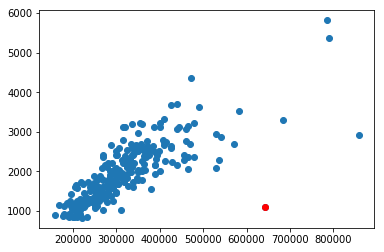

In [34]:
dd = df[df.zipcode == 98042]
dd_point = df[df.id == 8651400230]
plt.scatter(dd.price, dd.sqft_living)
plt.scatter(dd_point.price, dd_point.sqft_living, color='red')

Yes, both of them are outliers aswell which the regression could not identify. Lets go ahead and remove them.

In [35]:
df = df[df.price - round(df.price) == 0]

Lets view the scatter matrix again to see the general relationship between the variables again. 

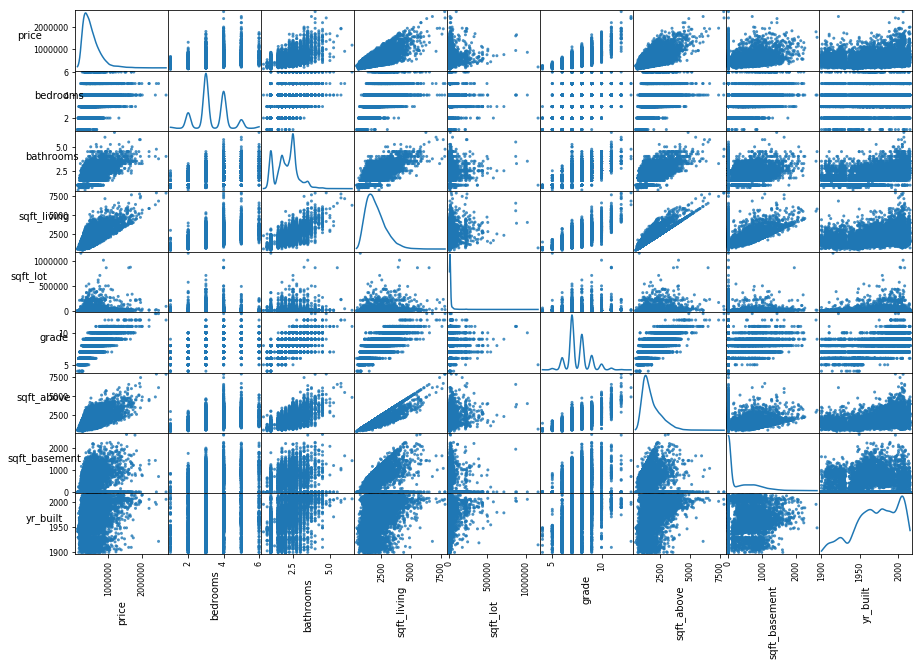

In [36]:
dd = df.drop(['id', 'date', 'floors', 'waterfront', 'view', 'condition','yr_renovated', 'zipcode', 'lat', 'long' ], axis=1)
# dd.plot.scatter_matrix()
sm = pd.plotting.scatter_matrix(dd, alpha=0.8, figsize=(15, 10), diagonal='kde')
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
plt.show()
#pd.plotting.scatter_matrix(df[['price', 'bathrooms', 'bedrooms']], alpha=0.2)

We can also see that removing the dirty price outliers, we have also removed the visual outliers in price ~ grade. This shows that those two points in price~grade seen earlier in the scatter matrix might have been due to the dirty price values. 

# grade and price

score 0.5092919685968567
coef [[3.13270027e-06]]
total data 9979
total outliers 39
total data 9979
total outliers 39


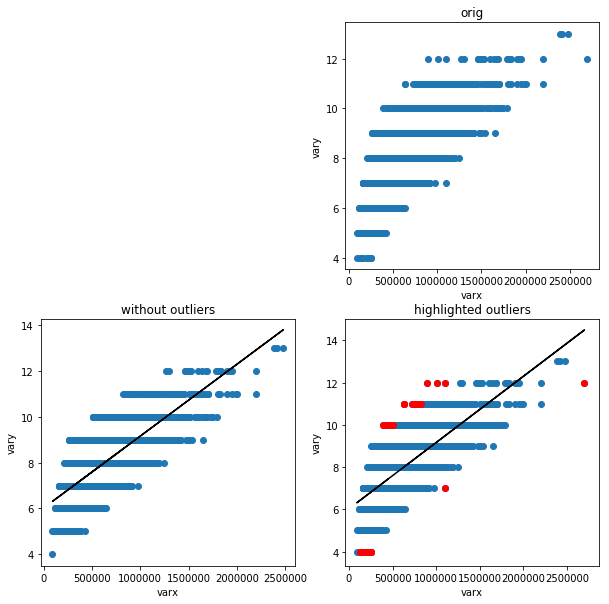

In [37]:
#data to check
x = df.price
y = df.grade
p = 0.004

#storing result of function
result = plot_lr_outliers(x, y, p)

We can see that the 2 most extreme points have bee  already removed. 

Althought the regression line highlights a few outliers at 0.4% but the points dont seem to deviate too much from the trend and hence may not be outliers. 

Due to this we have leave them in the dataset. 

# Price and sqft_above

score 0.38885661872175886
coef [[0.00198802]]
total data 9979
total outliers 19
total data 9979
total outliers 19


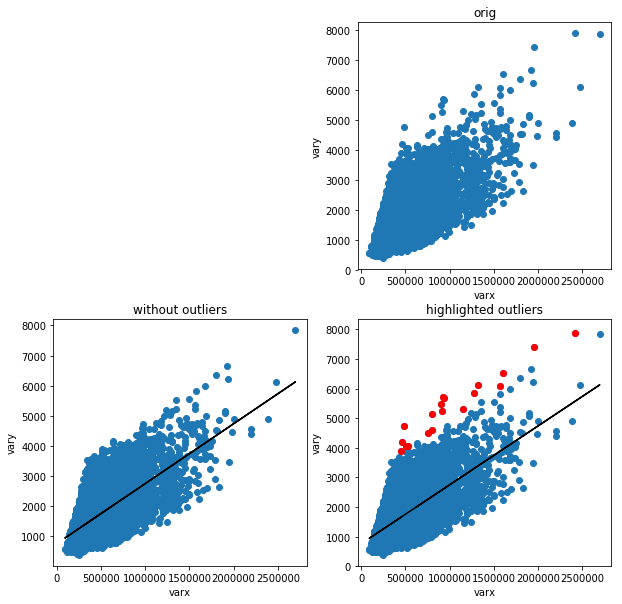

In [38]:
#data to check
x = df.price
y = df.sqft_above
p = 0.002

#storing result of function
result = plot_lr_outliers(x, y, p)

In this we can also, see that 2 extreme bottom points have already been removed. with price outliers. 

The points highlight above although far from the regression line seem to be following the trend. Also, the score of the regression line is not even that great hence we also need to rely on visually rather than only on the regression.

# Price and sqft lot

score 0.02069905774030356
coef [[0.02103863]]
total data 9979
total outliers 19
total data 9979
total outliers 19


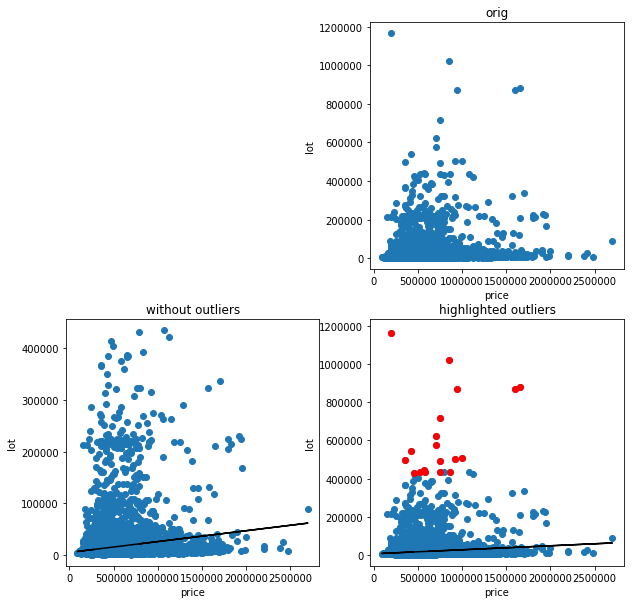

In [39]:
#data to check
x = df.price
y = df.sqft_lot
p = 0.002

#storing result of function
result = plot_lr_outliers(x, y, p, 'price', 'lot')

The score of the linear regression shows that the regression is almost useless and cannot be used to identify outliers in this case as there is no relationship. By viewing the relationship of sqft_lot with other variables we can see that there does not seem to be a good relation with any other variables either. 

Another way to identify the ouliers would be to apply univariate outlier detection techniques such as hampell identify, the 3 sd rule or the boxplot. But since this data is related to other varaibles aswell. It seems that Univariate outlier detection might not be the correct way to remove them unless, the outlier is way off. 

One thing that does seem however is that some points such as those for lot size above 800,000 seem to be way off the general lot size for similar prices. 

Lets view these points in the dataset.

In [40]:
df[df.sqft_lot > 800000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3628,2724079090,20150105T000000,1650000.0,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896
3725,225079036,20150107T000000,937500.0,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882
4055,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744
8313,1125079111,20150415T000000,1600000.0,4,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878
9566,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909


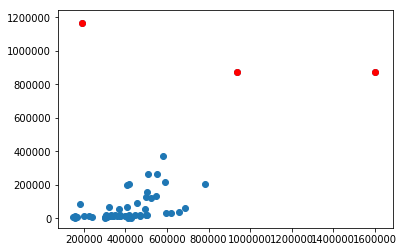

In [41]:
dd = df[df.zipcode == 98014]
dd_point = df[df.id.isin([225079036, 1125079111, 3326079016])]
plt.scatter(dd.price, dd.sqft_lot)
plt.scatter(dd_point.price, dd_point.sqft_lot, color='red')

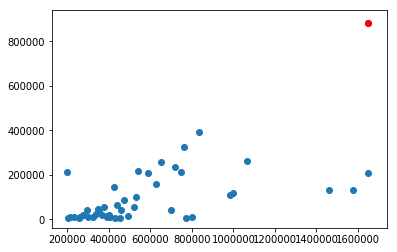

In [42]:
dd = df[df.zipcode == 98024]
dd_point = df[df.id==2724079090]
plt.scatter(dd.price, dd.sqft_lot)
plt.scatter(dd_point.price, dd_point.sqft_lot, color='red')

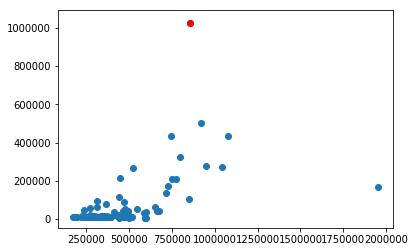

In [43]:
dd = df[df.zipcode == 98045]
dd_point = df[df.id==2323089009]
plt.scatter(dd.price, dd.sqft_lot)
plt.scatter(dd_point.price, dd_point.sqft_lot, color='red')

There seem to be alot of outliers, other than the ones identified as a whole, that seem to occur when viewing the square feet lot size specic to its zipcode location. Hence lets try to view the scatter of price with sqft_lot by its zipcode. 

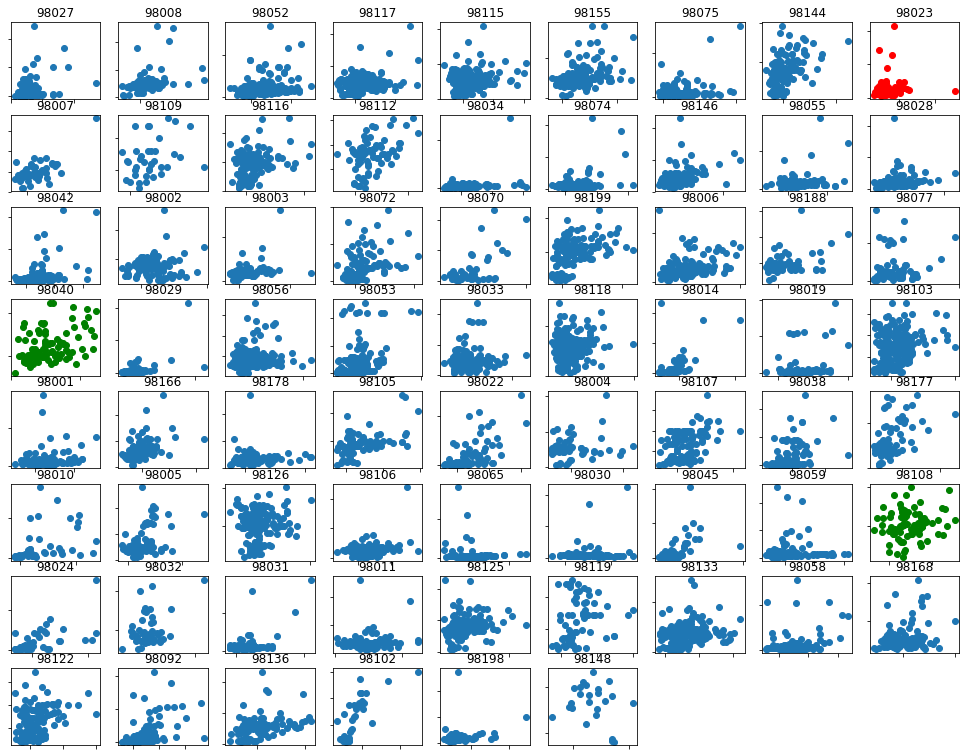

In [44]:
#create plot for each individual state with new xlimit
fig14 = plt.figure(figsize=(17, 15))

#run loop for each state
i=1 #identifier for subplot
for z in df.zipcode.unique():
    
    #create 8 subplots and tag current subplot as a new one
    ax1 = fig14.add_subplot(9,9,i)
    
    if z == 98023:
        #plot 
        ax1.scatter(df[df.zipcode==z].price, df[df.zipcode==z].sqft_lot, color='red')
    elif z in [98040, 98108]:
        #plot 
        ax1.scatter(df[df.zipcode==z].price, df[df.zipcode==z].sqft_lot, color='green')
    else:
        #plot 
        ax1.scatter(df[df.zipcode==z].price, df[df.zipcode==z].sqft_lot)
    #customise
    ax1.set_title(z)
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    
    #increment value for next subplot
    i += 1


There seem to be points that are much further away than the general density of points in the zipcodes, for example in zipcode 98023 (in red) there seems to be a property with really high price but very little lot area. 

One possibiity is to consider these points as outliers and remove them from the dataset. However, after looking at all the differnt scatterplots for the zipcodes, it seems theres is not much of a pattern or trend. Yes, in general for alot of the zipcodes the sqft_lot increases as price increases but there are alot of zipcodes such as 98040 or 98108 (in green), where there seems to be no correlation between price and sqft_lot size. 

Hence the point that seem to be an outlier, might actually not be one. For this report lets just remove the outliers we identified in the begining with sqft_lot area higher than 800,000. 

In [45]:
df = df[df.sqft_lot < 800000]

## Writing data back

In [46]:
len(df)

9974

In [47]:
df.to_csv('dataset4_solution.csv')

## Summary

There are multiple ways of doing outlier detection but since most of the variables were correlated with others univariate outlier detection was not used and linear regression was used to identfy variables. 

In this task I mainly focused on identifying outliers that would seem to affect the price of the property the most and were numberical values rather than categorical ones, **unless** there was a cleaer relationship between them and other variables like (bedrrom and bathrooms). 

Floors, view, condition were not used to detect outliers as they were ordered cateogrical variables and would not seem to have a high effect on the price. 

However since we had to be really careful in removing outliers linear regression was used to calculate the errors between the predictions and the true values and then using the top few percent of the ouliers the outliers were identified. For removing the outliers univariate methods on the errors were **not** used, but instread a general idea by looking at the outliers on scatter plots was used and the regression was used as an aid for this. 

Since some of the points did not have a proper relation with other varaibles their outliers were not removed as by viewing them by other facetting them with other variables it seemed that they might not really be outliers. 

Hence, only the outliers that really were off the general density of the plot were removed and very care was taken to not removed any extra points. 

## References

1. http://napitupulu-jon.appspot.com/posts/outliers-ud120.html
2. http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/